<a href="https://colab.research.google.com/github/trilgar/IAD2023/blob/main/CP4_%D0%97%D0%B0%D1%80%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><font size="6"><b>Комп'ютерний практикум 4.

Препроцесінг даних</b></font></center>

>Завантажимо бібліотеки та дані

In [ ]:
import pandas as pd
import numpy as np

##<center>__Самостійні завдання__</center>

> Скопіювати блок самостійних завдань в окремий файл ***LastName_CP4.ipynb***

> Інсталюйте необхідні пакети бібліотек Python

### Завдання №1

Завантажте дані з ресурсу

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

In [ ]:
# МІСЦЕ ДЛЯ КОДУ
import pandas as pd

URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

df = pd.read_csv(URL)

### Завдання №2

* Виведіть інформацію про датасет, описову статистику для кількісних змінних та для якісних змінних

* побудуйте графік регресії для змінних `Survived` та `Pclass`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         

<Axes: xlabel='Survived', ylabel='Pclass'>

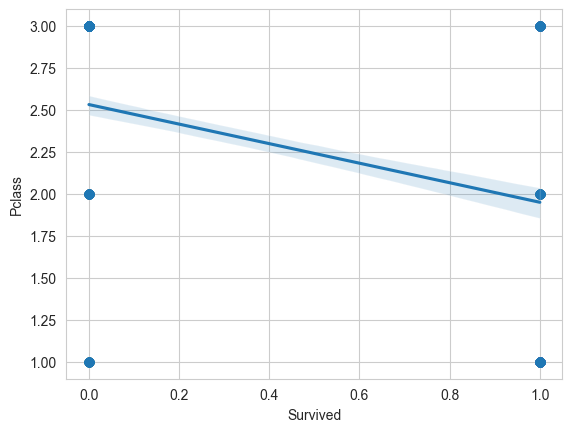

In [ ]:
# Інформація про датасет
print(df.info())
print(df.head(10))

# Описова статистика для якісних змінних
print(df.describe(include=['object']))

# Побудова графіку регресії для Survived та Pclass
sns.regplot(x='Survived', y='Pclass', data=df)

### Завдання №3

* побудуйте `heatmap()` для візуального відображення пропущених значень
* для кількісної змінної поповніть пропущені дані середнім значенням
* для категоріальної змінної поповніть пропущені значення значенням, яке зустрічається найчастіше

<Axes: >

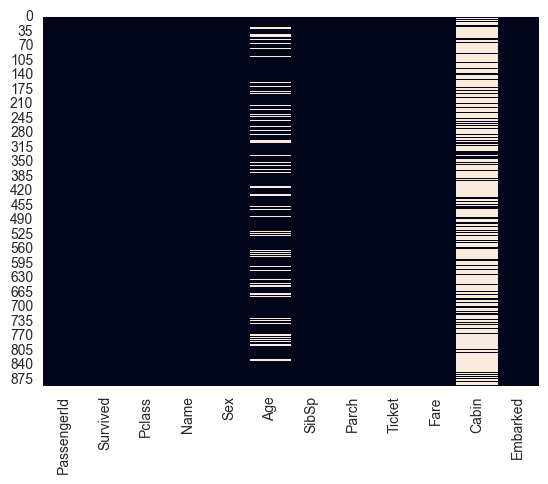

In [ ]:
sns.heatmap(df.isnull(), cbar=False)

<Axes: >

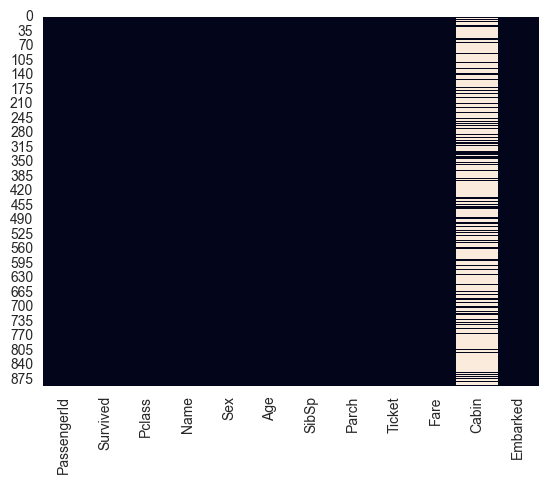

In [ ]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

sns.heatmap(df.isnull(), cbar=False)

<Axes: >

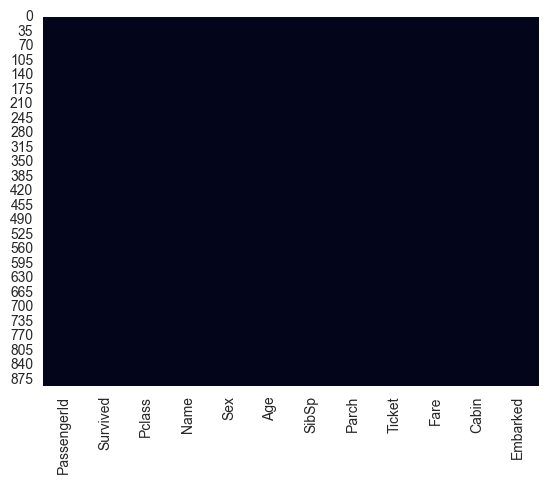

In [ ]:
mode_embarked = df['Cabin'].mode()[0]
df['Cabin'] = df['Cabin'].fillna(mode_embarked)

df_copy = df.copy();

sns.heatmap(df.isnull(), cbar=False)

### Завдання №4

Оберіть 4 категоріальних змінних та закодуйте:
* Змінну_1 -  за допомогою функції `LabelEncoder()`
* Змінну_2 -  за допомогою функції `get_dummies()`
* Змінну_3 -  за допомогою функції `OneHotEncoder()`
* Змінну_4 -  кількістю значень відповідної категорії


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Cabin']

le = LabelEncoder()
df[categorical_cols[0]] = le.fit_transform(df[categorical_cols[0]])

dummies = pd.get_dummies(df[categorical_cols[1]], prefix=categorical_cols[1], dummy_na=True)
df = pd.concat([df, dummies], axis=1)

df1=df[categorical_cols[2]]
ohe = preprocessing.OneHotEncoder(sparse=False)
df1=ohe.fit_transform(df1.values.reshape(-1,1))

cabin_counts = df[categorical_cols[3]].value_counts()
df['Cabin_Counts'] = df[categorical_cols[3]].map(cabin_counts)

df.head()

C:\Users\ALEX\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan,Cabin_Counts
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,0,1,0,691
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,0,1,0,691
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S,0,0,1,0,691


### Завдання №5
Поділіть на 4 вікові групи змінну `Age`

In [ ]:
# Створення 4-х вікових груп
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80], labels=['0-20', '20-40', '40-60', '60-80'])

# Виведення результатів
print(df[['Age', 'Age_Group']].head(10))

         Age Age_Group
0  22.000000     20-40
1  38.000000     20-40
2  26.000000     20-40
3  35.000000     20-40
4  35.000000     20-40
5  29.699118     20-40
6  54.000000     40-60
7   2.000000      0-20
8  27.000000     20-40
9  14.000000      0-20


### Завдання №6

* Створіть новий датафрейм з вихідного тільки із числових значень
* Застосуйте $MinMax$-Нормування даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $Standart Scaling$ даних та збережіть в новий датафрейм, виведіть описову статистику
* Застосуйте $L_1$-Нормування та збережіть в новий датафрейм, виведіть описову статистику


In [ ]:
df = df_copy

# Створення нового датафрейму тільки із числових значень
df_numeric = df.select_dtypes(include=['float64', 'int64'])

print(df_numeric.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [ ]:
# Створення екземпляру класу MinMaxScaler
scaler = MinMaxScaler()

# Нормування даних та збереження у новому датафреймі
df_numeric_minmax = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Виведення описової статистики
print(df_numeric_minmax.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean      0.500000    0.383838    0.654321    0.367921    0.065376   
std       0.289162    0.486592    0.418036    0.163383    0.137843   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.250000    0.000000    0.500000    0.271174    0.000000   
50%       0.500000    0.000000    1.000000    0.367921    0.000000   
75%       0.750000    1.000000    1.000000    0.434531    0.125000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.063599    0.062858  
std      0.134343    0.096995  
min      0.000000    0.000000  
25%      0.000000    0.015440  
50%      0.000000    0.028213  
75%      0.000000    0.060508  
max      1.000000    1.000000  


In [ ]:
# Створення екземпляру класу StandardScaler
scaler = StandardScaler()

# Нормування даних та збереження у новому датафреймі
df_numeric_stand = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Виведення описової статистики
print(df_numeric_stand.describe())

        PassengerId      Survived        Pclass           Age         SibSp  \
count  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02  8.910000e+02   
mean   6.379733e-17  3.987333e-17 -8.772133e-17  2.232906e-16  4.386066e-17   
std    1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00  1.000562e+00   
min   -1.730108e+00 -7.892723e-01 -1.566107e+00 -2.253155e+00 -4.745452e-01   
25%   -8.650540e-01 -7.892723e-01 -3.693648e-01 -5.924806e-01 -4.745452e-01   
50%    0.000000e+00 -7.892723e-01  8.273772e-01  0.000000e+00 -4.745452e-01   
75%    8.650540e-01  1.266990e+00  8.273772e-01  4.079260e-01  4.327934e-01   
max    1.730108e+00  1.266990e+00  8.273772e-01  3.870872e+00  6.784163e+00   

              Parch          Fare  
count  8.910000e+02  8.910000e+02  
mean   5.382900e-17  3.987333e-18  
std    1.000562e+00  1.000562e+00  
min   -4.736736e-01 -6.484217e-01  
25%   -4.736736e-01 -4.891482e-01  
50%   -4.736736e-01 -3.573909e-01  
75%   -4.736736e-01 -2.424635e-02  


In [ ]:
from sklearn.preprocessing import normalize

# L1-нормування
df_normalized = pd.DataFrame(normalize(df_numeric, norm='l1'), columns=df_numeric.columns)

# Описова статистика
print(df_normalized.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean      0.816471    0.001229    0.007912    0.089942    0.001860   
std       0.174168    0.002700    0.010215    0.094400    0.005879   
min       0.017500    0.000000    0.000777    0.000513    0.000000   
25%       0.772592    0.000000    0.002862    0.037984    0.000000   
50%       0.880978    0.000000    0.004508    0.058507    0.000000   
75%       0.929723    0.001533    0.008444    0.101586    0.001416   
max       0.982961    0.026525    0.087591    0.685602    0.078792   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.001195    0.081389  
std      0.003930    0.107248  
min      0.000000    0.000000  
25%      0.000000    0.017510  
50%      0.000000    0.040442  
75%      0.000000    0.093140  
max      0.053605    0.832278  
